In [35]:
import numpy as np
import pandas as pd

In [36]:
data=pd.read_csv('googleplaystore_v2.csv')

In [37]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
data.shape

(10841, 13)

In [39]:
data.duplicated().sum()

483

In [40]:
#will remove duplicates
data.drop_duplicates(inplace=True)

In [41]:
data.shape

(10358, 13)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [43]:
data.describe()

,Rating,Size
count,8893.000000,10358.000000
mean,4.189542,21321.509856
std,0.545452,20812.552217
min,1.000000,8.500000
25%,4.000000,5700.000000
50%,4.300000,17000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [44]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [45]:
#will fill with average rating
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

<ipython-input-45-f711b23174a4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].mean(),inplace=True)


In [46]:
data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [47]:
data.dropna(inplace=True)

In [48]:
data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [49]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


let us check the rating and number of installs distribution and we will conclude the apps accordingly wether they are Popular or Not popular apps

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-51-efd0e6ad2556>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rating'])


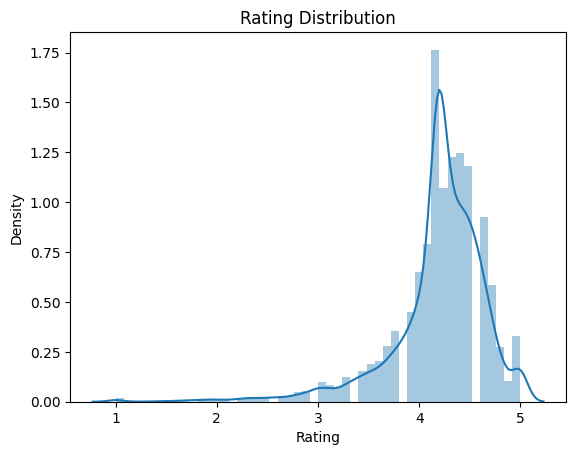

In [51]:
# let us check the distribution of rating
sns.distplot(data['Rating'])
plt.title('Rating Distribution')
plt.show()

we can see that the rating is distributed from 0-5

In [53]:
data['Installs']=data['Installs'].str.replace(',','').str.replace('+','').astype(int)

<ipython-input-54-d75c1a6e1ee8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Installs'])


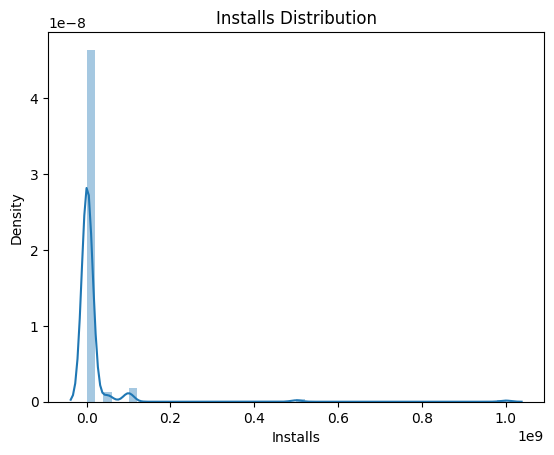

In [54]:
sns.distplot(data['Installs'])
plt.title('Installs Distribution')
plt.show()

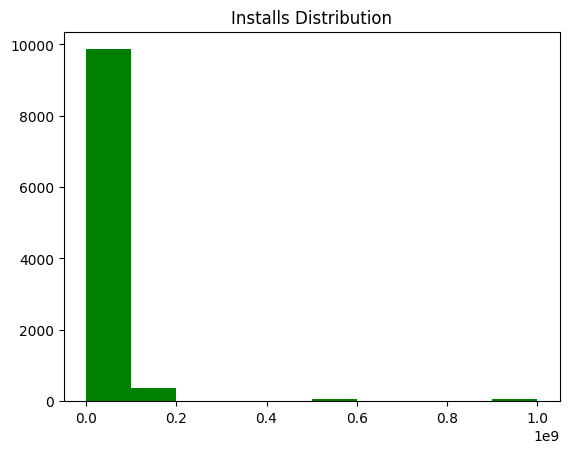

In [56]:
plt.hist(data['Installs'],color='green')
plt.title('Installs Distribution')
plt.show()

In [59]:
print(data['Installs'].describe())

count    1.034600e+04
mean     1.417266e+07
std      8.028090e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


Text(0, 0.5, 'Frequency')

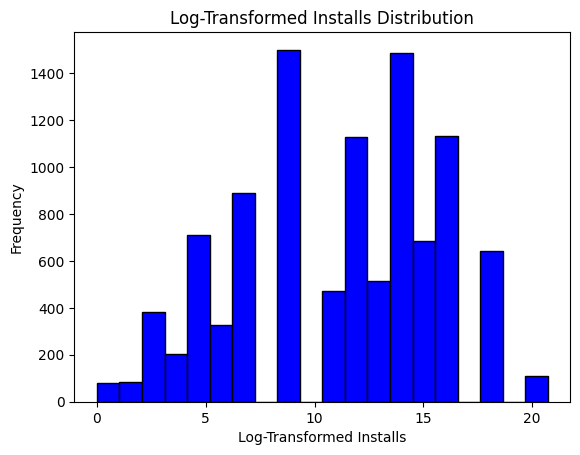

In [62]:
log_installs = np.log1p(data['Installs'])
plt.hist(log_installs, bins=20, color='blue', edgecolor='black')
plt.title('Log-Transformed Installs Distribution')
plt.xlabel('Log-Transformed Installs')
plt.ylabel('Frequency')

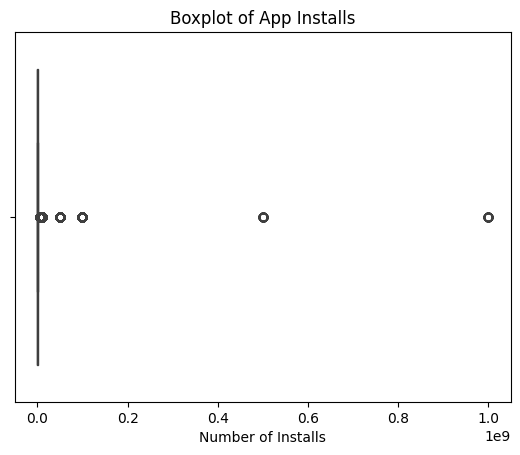

In [64]:
sns.boxplot(x=data['Installs'])
plt.xlabel('Number of Installs')
plt.title('Boxplot of App Installs')
plt.show()

In [69]:
#let us make apps popular or not
def popularity(row):
  if row['Installs']>100000 and row['Rating']>4.0:
    return 1
  else:
    return 0

## Feature Extraction

In [70]:
data['Popularity']=data.apply(popularity,axis=1)

In [71]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [72]:
data.Popularity.value_counts()

,count
Popularity,
0,6674
1,3672


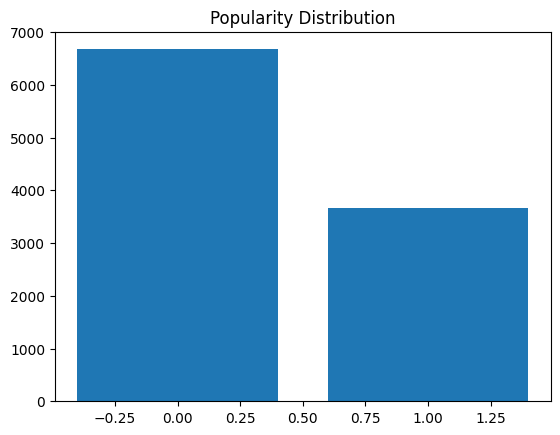

In [73]:
plt.bar(data['Popularity'].value_counts().index,data['Popularity'].value_counts().values)
plt.title('Popularity Distribution')
plt.show()

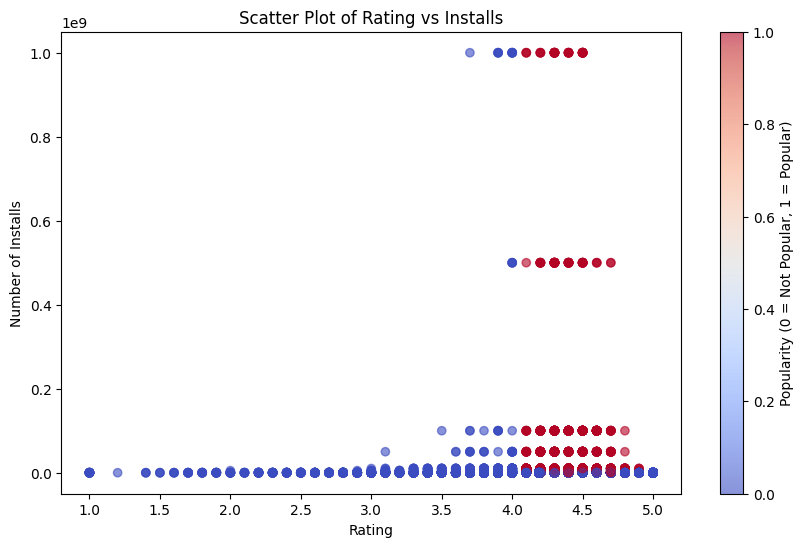

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rating'], data['Installs'], c=data['Popularity'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Popularity (0 = Not Popular, 1 = Popular)')
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Scatter Plot of Rating vs Installs')
plt.show()

we will classify the apps by the 2 features that number of installls and rating.


In [77]:
x=data[['Rating','Installs']]
y=data['Popularity']

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [80]:
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [81]:
y_pred=model.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred)

1.0

In [83]:
confusion_matrix(y_test,y_pred)

array([[1326,    0],
       [   0,  744]])